In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
FONT_SIZE = 15
FONT_WEIGHT = 'bold'

In [5]:
# /home/u55hy/Documents/Research/safe-drive-fed-inc/safe-drive-fed-inc/runs/detect/round_1_fed1_fine_tune_client1/results.csv
base_path = os.path.join(os.getcwd())

Dataset

In [3]:
# Print the number of images in each round for each device folder
device_folders = ['server', 'client1', 'client2', 'client3', 'client4']
rounds = ['round_1', 'round_2', 'round_3', 'round_4', 'round_5']
subfolders = ['train']

for device in device_folders:
    print(f"Device: {device}")
    for round_name in rounds:
        total_images = 0
        for subfolder in subfolders:
            images_path = os.path.join(device, 'incremental_dataset', round_name, subfolder, 'images')
            if os.path.exists(images_path):
                total_images += len([name for name in os.listdir(images_path) if os.path.isfile(os.path.join(images_path, name))])
        print(f"  {round_name}: {total_images} images")

Device: server
  round_1: 300 images
  round_2: 345 images
  round_3: 515 images
  round_4: 518 images
  round_5: 524 images
Device: client1
  round_1: 134 images
  round_2: 171 images
  round_3: 270 images
  round_4: 272 images
  round_5: 281 images
Device: client2
  round_1: 77 images
  round_2: 100 images
  round_3: 169 images
  round_4: 172 images
  round_5: 172 images
Device: client3
  round_1: 180 images
  round_2: 218 images
  round_3: 310 images
  round_4: 312 images
  round_5: 316 images
Device: client4
  round_1: 243 images
  round_2: 273 images
  round_3: 410 images
  round_4: 413 images
  round_5: 425 images


Federated Learning

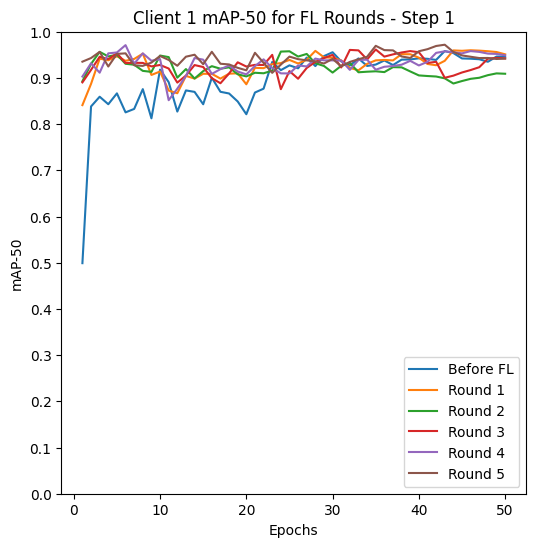

<Figure size 640x480 with 0 Axes>

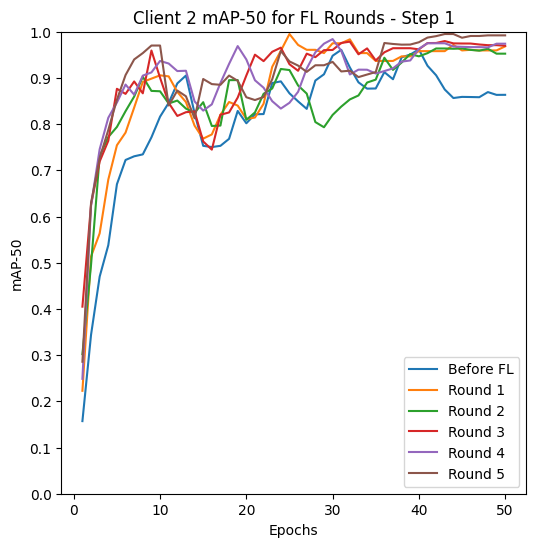

<Figure size 640x480 with 0 Axes>

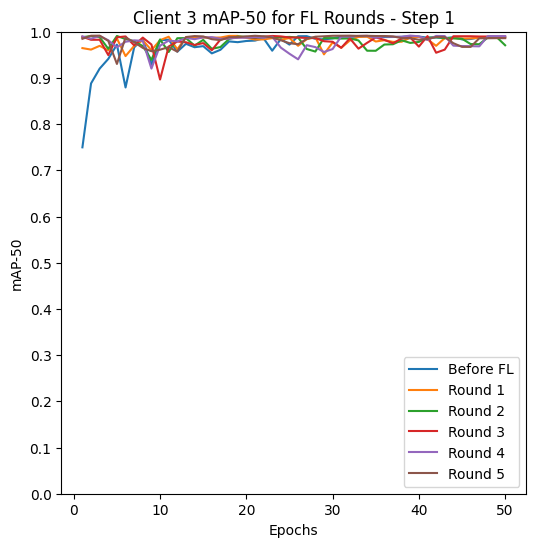

<Figure size 640x480 with 0 Axes>

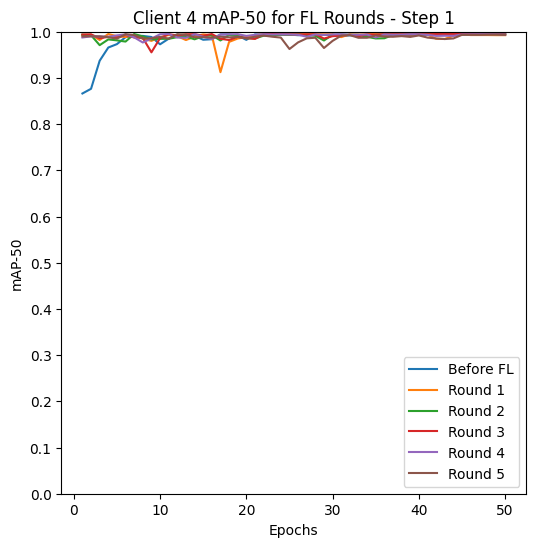

<Figure size 640x480 with 0 Axes>

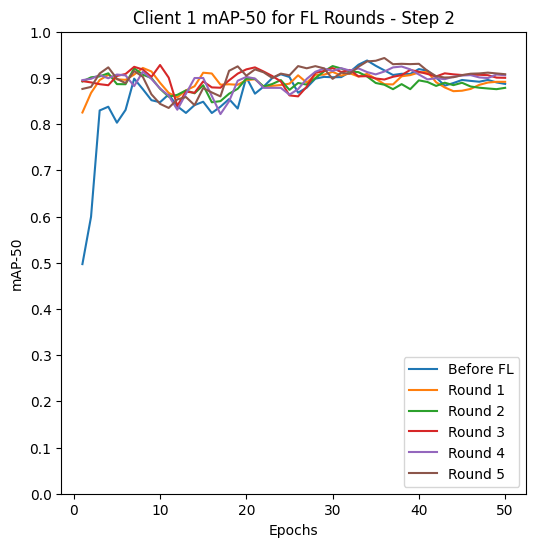

<Figure size 640x480 with 0 Axes>

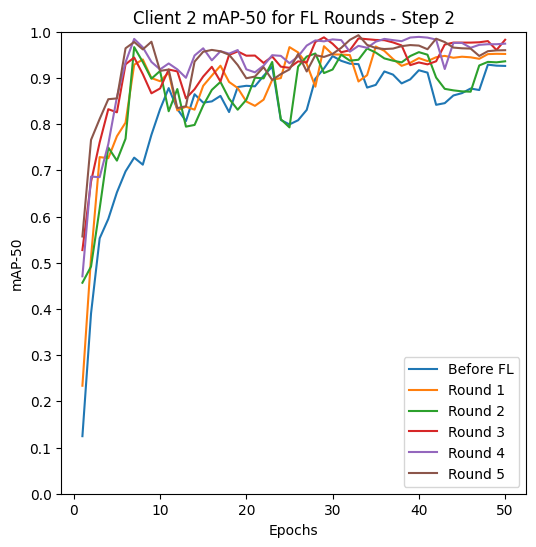

<Figure size 640x480 with 0 Axes>

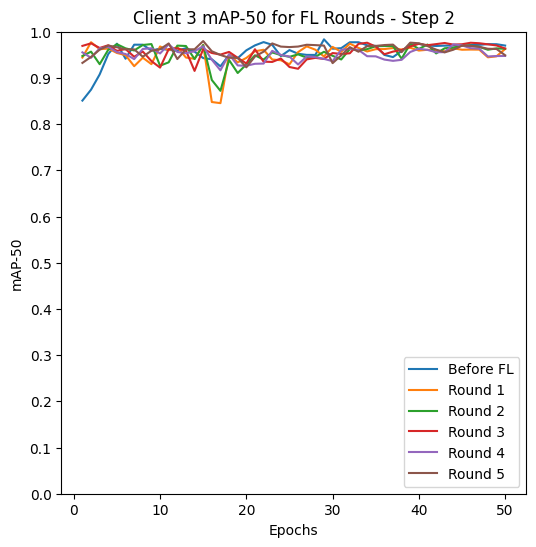

<Figure size 640x480 with 0 Axes>

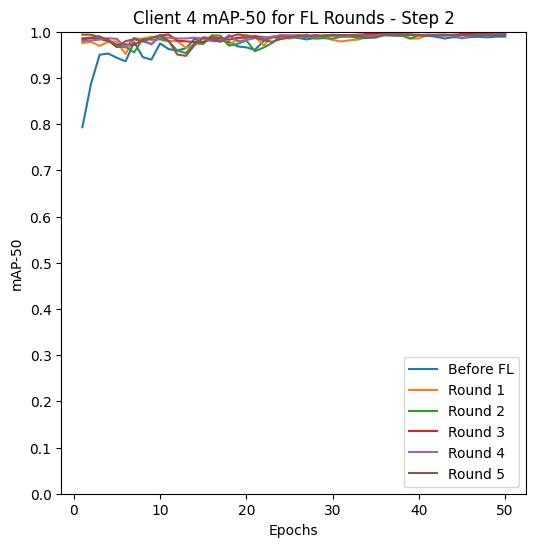

<Figure size 640x480 with 0 Axes>

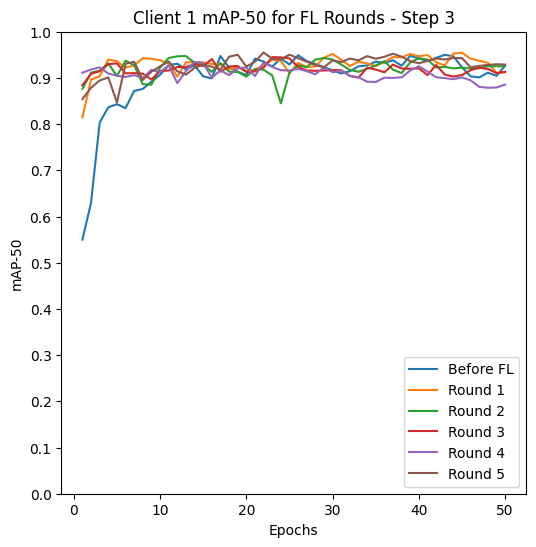

<Figure size 640x480 with 0 Axes>

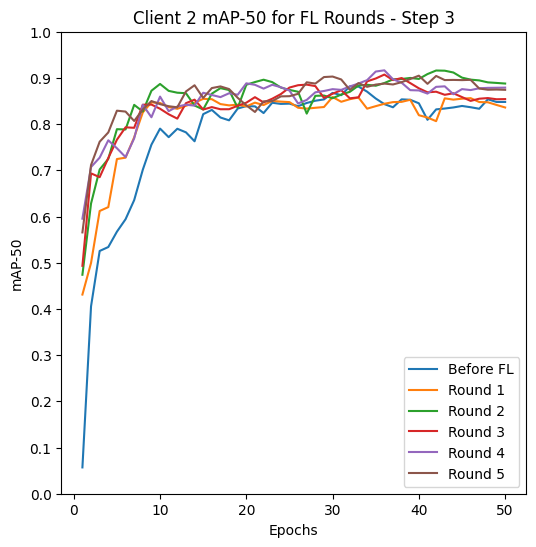

<Figure size 640x480 with 0 Axes>

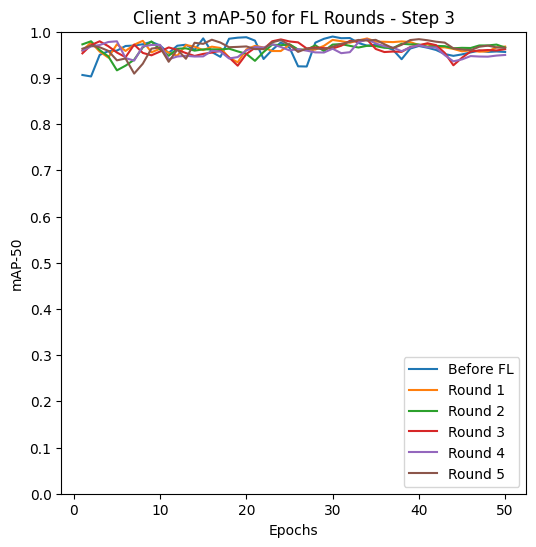

<Figure size 640x480 with 0 Axes>

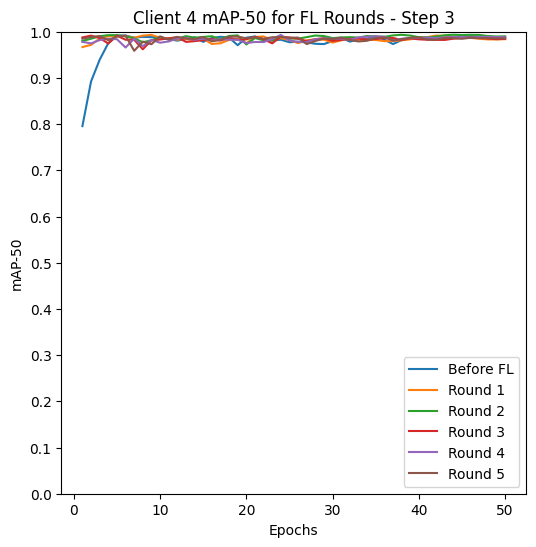

<Figure size 640x480 with 0 Axes>

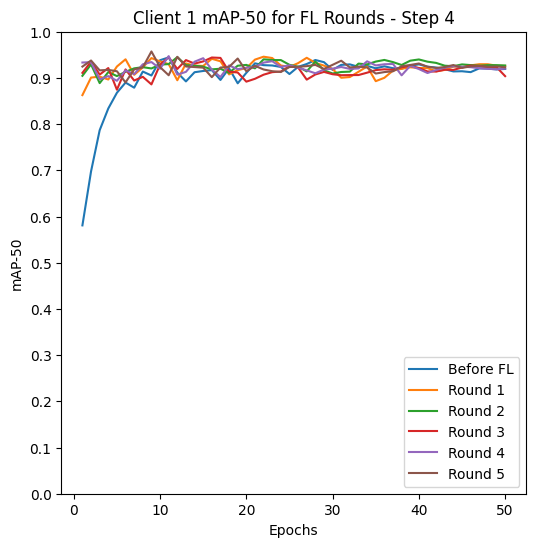

<Figure size 640x480 with 0 Axes>

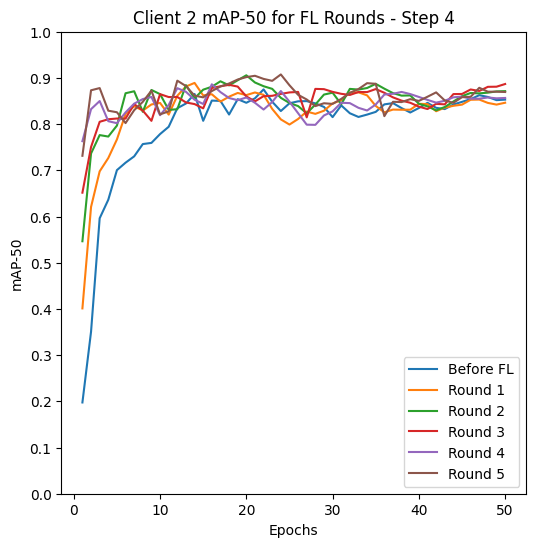

<Figure size 640x480 with 0 Axes>

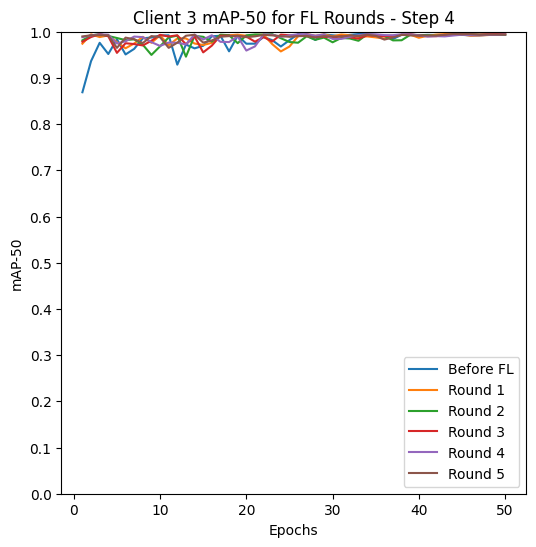

<Figure size 640x480 with 0 Axes>

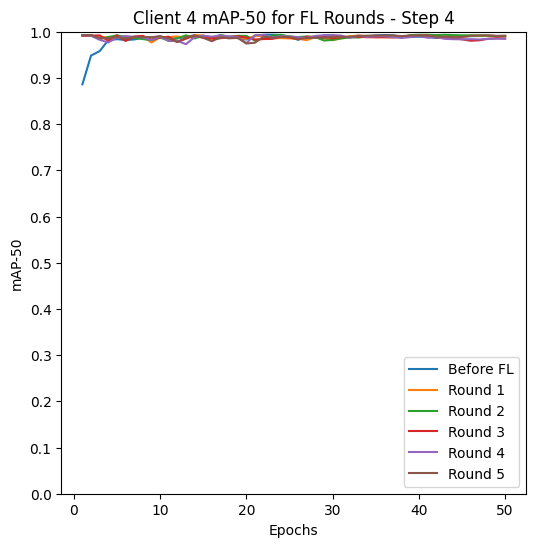

<Figure size 640x480 with 0 Axes>

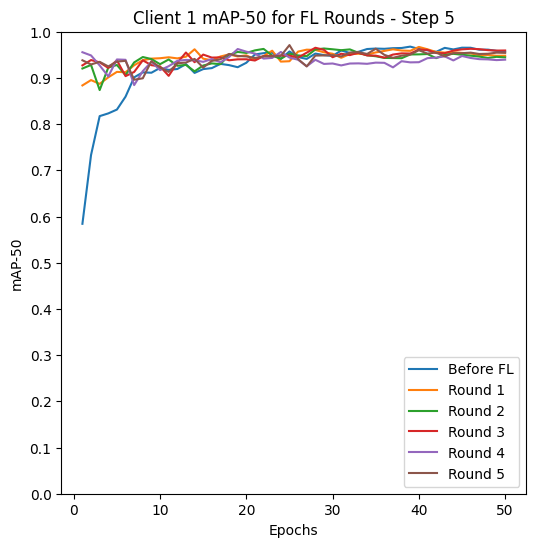

<Figure size 640x480 with 0 Axes>

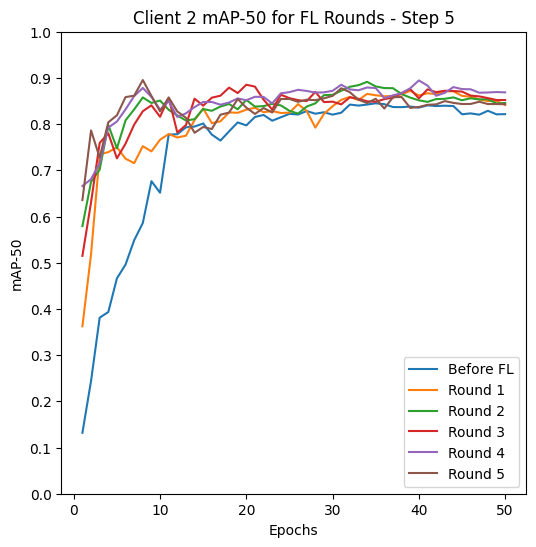

<Figure size 640x480 with 0 Axes>

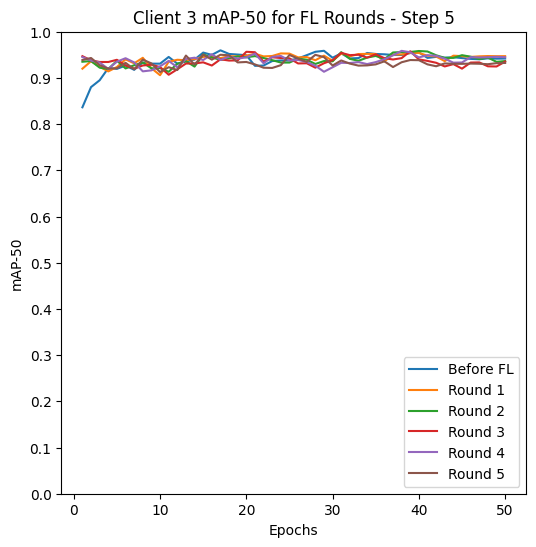

<Figure size 640x480 with 0 Axes>

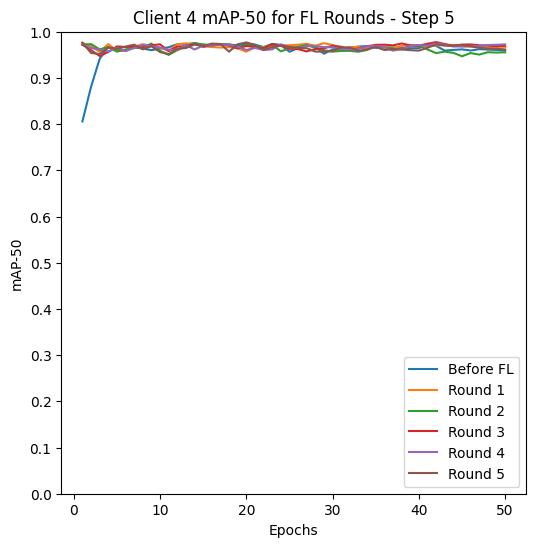

<Figure size 640x480 with 0 Axes>

In [7]:
for steps in range(1, 6):
    for i in range(1, 5):
        no_fed = pd.read_csv(base_path + f'/runs/detect/round_{steps}_fine_tune_client{i}/results.csv')
        fed_1 = pd.read_csv(base_path + f'/runs/detect/round_{steps}_fed1_fine_tune_client{i}/results.csv')
        fed_2 = pd.read_csv(base_path + f'/runs/detect/round_{steps}_fed12_fine_tune_client{i}/results.csv')
        fed_3 = pd.read_csv(base_path + f'/runs/detect/round_{steps}_fed123_fine_tune_client{i}/results.csv')
        fed_4 = pd.read_csv(base_path + f'/runs/detect/round_{steps}_fed1234_fine_tune_client{i}/results.csv')
        fed_5 = pd.read_csv(base_path + f'/runs/detect/round_{steps}_fed12345_fine_tune_client{i}/results.csv')

        epochs = fed_1['epoch']
        map_0 = no_fed['metrics/mAP50(B)']
        map_1 = fed_1['metrics/mAP50(B)']
        map_2 = fed_2['metrics/mAP50(B)']
        map_3 = fed_3['metrics/mAP50(B)']
        map_4 = fed_4['metrics/mAP50(B)']
        map_5 = fed_5['metrics/mAP50(B)']

        plt.figure(figsize=(6, 6))
        plt.plot(epochs, map_0, label='Before FL')
        plt.plot(epochs, map_1, label='Round 1')
        plt.plot(epochs, map_2, label='Round 2')
        plt.plot(epochs, map_3, label='Round 3')
        plt.plot(epochs, map_4, label='Round 4')
        plt.plot(epochs, map_5, label='Round 5')

        plt.title(f'Client {i} mAP-50 for FL Rounds - Step {steps}')
        plt.xlabel('Epochs')
        plt.ylabel('mAP-50')
        plt.legend(loc='lower right')
        plt.ylim(0, 1)
        plt.yticks([i * 0.1 for i in range(11)])
        plt.show()
        plt.savefig(base_path + f'/plots/round_{steps}_client{i}.jpg')

Server - Incremental Results

In [9]:
for i in range(1, 6):
    server = []
    client1 = []
    client2 = []
    # if i == 1:
    #     server = pd.read_csv(base_path + f'/runs/detect/round_1/results.csv')
    #     client1 = pd.read_csv(base_path + f'/runs/detect/round_1_fine_tune_client1/results.csv')
    #     client2 = pd.read_csv(base_path + f'/runs/detect/round_1_fine_tune_client2/results.csv')
    # else:
    server = pd.read_csv(base_path + f'/runs/detect/round_{i}/results.csv')
    # client1 = pd.read_csv(base_path + f'/runs/detect/round_{i}_fine_tune_client1/results.csv')
    # client2 = pd.read_csv(base_path + f'/runs/detect/round_{i}_fine_tune_client2/results.csv')
    # server['metrics/recall(B)']    
    map = server['metrics/recall(B)'].iloc[-1]
    prec = server['metrics/precision(B)'].iloc[-1]
    rec = server['metrics/recall(B)'].iloc[-1]

    # map_1 = client1['metrics/recall(B)'].iloc[-1]
    # map_2 = client2['metrics/recall(B)'].iloc[-1]
    # print(map_0, map_1, map_2)
    print(f'Step {i} - map50: {map:.4f}, precision: {prec:.4f}, recall: {rec:.4f}')

Step 1 - map50: 0.9381, precision: 0.9666, recall: 0.9381
Step 2 - map50: 0.9450, precision: 0.9470, recall: 0.9450
Step 3 - map50: 0.9277, precision: 0.9874, recall: 0.9277
Step 4 - map50: 0.9686, precision: 0.9607, recall: 0.9686
Step 5 - map50: 0.9515, precision: 0.9403, recall: 0.9515


Client - Incremental Results

In [ ]:
for step in range(1, 6):
    for client in range(1, 5):
        client_pd = pd.read_csv(base_path + f'/runs/detect/round_{i}/results.csv')

        map = client_pd['metrics/recall(B)'].iloc[-1]
        prec = client_pd['metrics/precision(B)'].iloc[-1]
        rec = client_pd['metrics/recall(B)'].iloc[-1]

        print(f'Step {step} Client {client} - map50: {map:.4f}, precision: {prec:.4f}, recall: {rec:.4f}')

Clients - Federated Learning

In [6]:
for i in range(1, 5):
    no_fed = pd.read_csv(base_path + f'/runs/detect/round_5_fine_tune_client{i}/results.csv')
    fed_1 = pd.read_csv(base_path + f'/runs/detect/round_5_fed1_fine_tune_client{i}/results.csv')
    fed_2 = pd.read_csv(base_path + f'/runs/detect/round_5_fed12_fine_tune_client{i}/results.csv')
    fed_3 = pd.read_csv(base_path + f'/runs/detect/round_5_fed123_fine_tune_client{i}/results.csv')
    fed_4 = pd.read_csv(base_path + f'/runs/detect/round_5_fed1234_fine_tune_client{i}/results.csv')
    fed_5 = pd.read_csv(base_path + f'/runs/detect/round_5_fed12345_fine_tune_client{i}/results.csv')
    
    print(f'Client {i}')
    print(f'Precision: {no_fed['metrics/precision(B)'].iloc[-1]}, Recall: {no_fed['metrics/recall(B)'].iloc[-1]}, mAP50: {no_fed["metrics/mAP50(B)"].iloc[-1]}')
    print(f'Precision: {fed_1['metrics/precision(B)'].iloc[-1]}, Recall: {fed_1['metrics/recall(B)'].iloc[-1]}, mAP50: {fed_1["metrics/mAP50(B)"].iloc[-1]}')
    print(f'Precision: {fed_2['metrics/precision(B)'].iloc[-1]}, Recall: {fed_2['metrics/recall(B)'].iloc[-1]}, mAP50: {fed_2["metrics/mAP50(B)"].iloc[-1]}')
    print(f'Precision: {fed_3['metrics/precision(B)'].iloc[-1]}, Recall: {fed_3['metrics/recall(B)'].iloc[-1]}, mAP50: {fed_3["metrics/mAP50(B)"].iloc[-1]}')
    print(f'Precision: {fed_4['metrics/precision(B)'].iloc[-1]}, Recall: {fed_4['metrics/recall(B)'].iloc[-1]}, mAP50: {fed_4["metrics/mAP50(B)"].iloc[-1]}')
    print(f'Precision: {fed_5['metrics/precision(B)'].iloc[-1]}, Recall: {fed_5['metrics/recall(B)'].iloc[-1]}, mAP50: {fed_5["metrics/mAP50(B)"].iloc[-1]}')

Client 1
Precision: 0.919, Recall: 0.9367, mAP50: 0.95672
Precision: 0.91942, Recall: 0.91917, mAP50: 0.94807
Precision: 0.9203, Recall: 0.92406, mAP50: 0.94455
Precision: 0.95298, Recall: 0.90115, mAP50: 0.95938
Precision: 0.93938, Recall: 0.91057, mAP50: 0.9395
Precision: 0.92111, Recall: 0.91834, mAP50: 0.95422
Client 2
Precision: 0.84404, Recall: 0.75384, mAP50: 0.82162
Precision: 0.80187, Recall: 0.83494, mAP50: 0.84127
Precision: 0.83544, Recall: 0.83792, mAP50: 0.84565
Precision: 0.86191, Recall: 0.82955, mAP50: 0.85219
Precision: 0.84619, Recall: 0.84437, mAP50: 0.86875
Precision: 0.81171, Recall: 0.83956, mAP50: 0.8432
Client 3
Precision: 0.93796, Recall: 0.92711, mAP50: 0.94198
Precision: 0.94479, Recall: 0.93146, mAP50: 0.94714
Precision: 0.95198, Recall: 0.90913, mAP50: 0.93648
Precision: 0.90819, Recall: 0.93152, mAP50: 0.93538
Precision: 0.917, Recall: 0.9442, mAP50: 0.94477
Precision: 0.93201, Recall: 0.94337, mAP50: 0.93242
Client 4
Precision: 0.93046, Recall: 0.94917, 

# mAP50 Distribution - Incremental Learning

Server

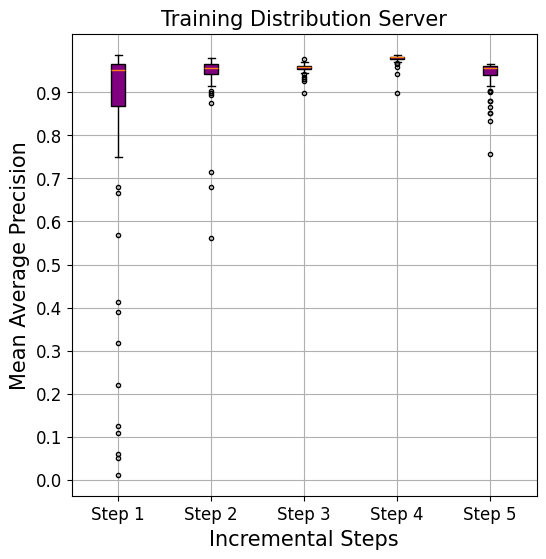

In [48]:
round_1 = pd.read_csv(base_path + '/runs/detect/round_1/results.csv')
round_2 = pd.read_csv(base_path + '/runs/detect/round_2/results.csv')
round_3 = pd.read_csv(base_path + '/runs/detect/round_3/results.csv')
round_4 = pd.read_csv(base_path + '/runs/detect/round_4/results.csv')
round_5 = pd.read_csv(base_path + '/runs/detect/round_5/results.csv')
mAP50 = [
    round_1['metrics/mAP50(B)'],  # Group 1
    round_2['metrics/mAP50(B)'],  # Group 2
    round_3['metrics/mAP50(B)'],
    round_4['metrics/mAP50(B)'],
    round_5['metrics/mAP50(B)'],# Group 3
]

# precision = [
#     [0.9936, 0.9677, 0.9174, 0.9559, 0.9420],
#     [0.9234, 0.9521, 0.9691, 0.9379, 0.9550],
#     [0.8596, 0.9122, 0.8279, 0.8080, 0.8349]
# ]

# recall = [
#     [0.9545, 0.8933, 0.8814, 0.9926, 0.9611],
#     [1.0000, 0.9422, 0.9188, 0.8920, 0.9024],
#     [0.8333, 0.8221, 0.8237, 0.8308, 0.8362]
# ]

data = mAP50
plt.figure(figsize=(6, 6))
plt.boxplot(data, widths=0.15, patch_artist=True, boxprops=dict(facecolor='purple'), flierprops=dict(marker='o', markersize=3), tick_labels=['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5'])
plt.title(f'Training Distribution Server', fontsize=FONT_SIZE)
plt.xlabel('Incremental Steps', fontsize=FONT_SIZE)
plt.ylabel('Mean Average Precision', fontsize=FONT_SIZE)
plt.grid(True)
plt.yticks(ticks=[i * 0.1 for i in range(10)])
plt.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(ticks=[i * 0.1 for i in range(10)])
plt.show()

Clients

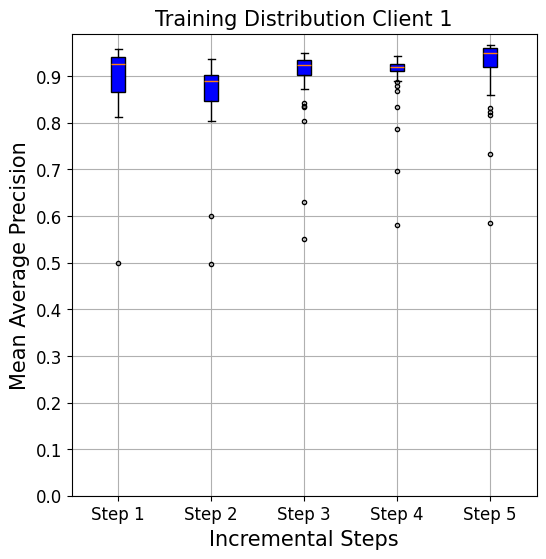

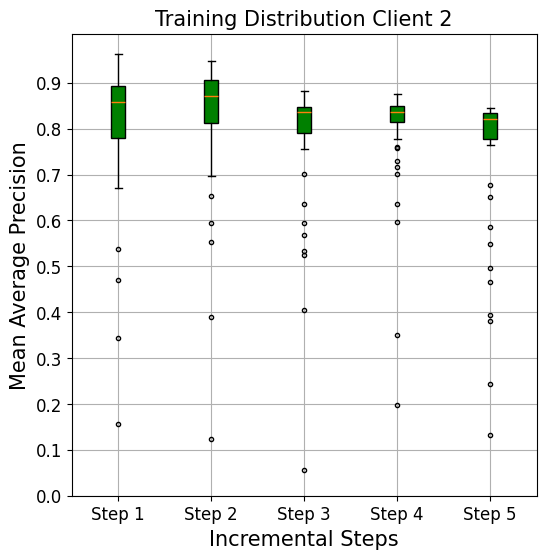

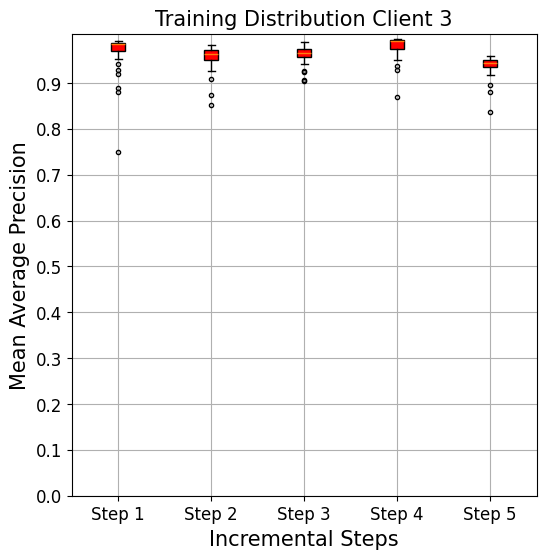

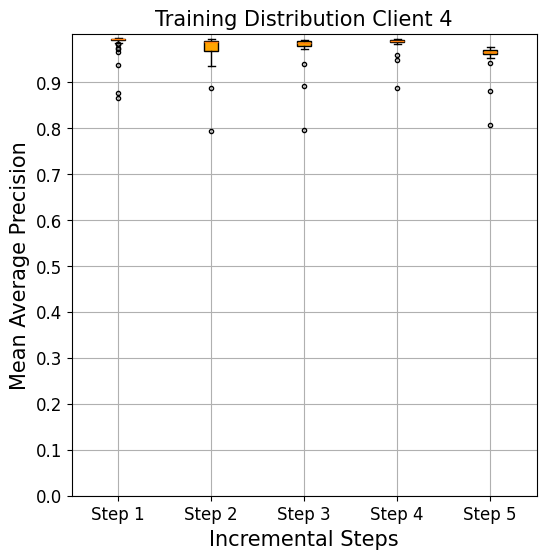

In [49]:
for i in range(1, 5):
    step_1 = pd.read_csv(base_path + f'/runs/detect/round_1_fine_tune_client{i}/results.csv')
    step_2 = pd.read_csv(base_path + f'/runs/detect/round_2_fine_tune_client{i}/results.csv')
    step_3 = pd.read_csv(base_path + f'/runs/detect/round_3_fine_tune_client{i}/results.csv')
    step_4 = pd.read_csv(base_path + f'/runs/detect/round_4_fine_tune_client{i}/results.csv')
    step_5 = pd.read_csv(base_path + f'/runs/detect/round_5_fine_tune_client{i}/results.csv')
    mAP50 = [
        step_1['metrics/mAP50(B)'],  # Group 1
        step_2['metrics/mAP50(B)'],  # Group 2
        step_3['metrics/mAP50(B)'],
        step_4['metrics/mAP50(B)'],
        step_5['metrics/mAP50(B)'],# Group 3
    ]

    # precision = [
    #     [0.9936, 0.9677, 0.9174, 0.9559, 0.9420],
    #     [0.9234, 0.9521, 0.9691, 0.9379, 0.9550],
    #     [0.8596, 0.9122, 0.8279, 0.8080, 0.8349]
    # ]

    # recall = [
    #     [0.9545, 0.8933, 0.8814, 0.9926, 0.9611],
    #     [1.0000, 0.9422, 0.9188, 0.8920, 0.9024],
    #     [0.8333, 0.8221, 0.8237, 0.8308, 0.8362]
    # ]

    data = mAP50
    plt.figure(figsize=(6, 6))
    colors = ['blue', 'green', 'red', 'orange']
    plt.boxplot(data, widths=0.15, patch_artist=True, boxprops=dict(facecolor=colors[i-1]), flierprops=dict(marker='o', markersize=3), tick_labels=['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5'])
    plt.title(f'Training Distribution Client {i}', fontsize=FONT_SIZE)
    plt.xlabel('Incremental Steps', fontsize=FONT_SIZE)
    plt.ylabel('Mean Average Precision', fontsize=FONT_SIZE)
    plt.grid(True)
    plt.yticks(ticks=[i * 0.1 for i in range(10)])
    plt.tick_params(axis='both', which='major', labelsize=12)
    # plt.gca().spines['top'].set_visible(False)
    plt.show()

In [140]:
# Calculate the median for each group
medians = [np.median(group) for group in data]

# Print the medians
for i, median in enumerate(medians, start=1):
    print(f'Median of Group {i}: {median:.4f}')

Median of Group 1: 0.9209
Median of Group 2: 0.8848
Median of Group 3: 0.8305
Median of Group 4: 0.8259
Median of Group 5: 0.8232


In [141]:
import numpy as np 

client1 = [0.99125, 0.90832, 0.94512, 0.96031, 0.96461]
client2 = [0.93352, 0.93641, 0.8291, 0.85825, 0.86992]

print(np.mean(client1), np.mean(client2))

0.953922 0.88544


# Distribution - Federated Learning

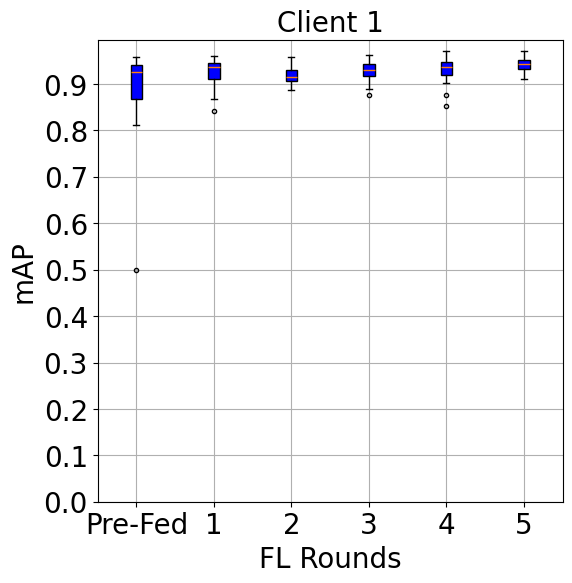

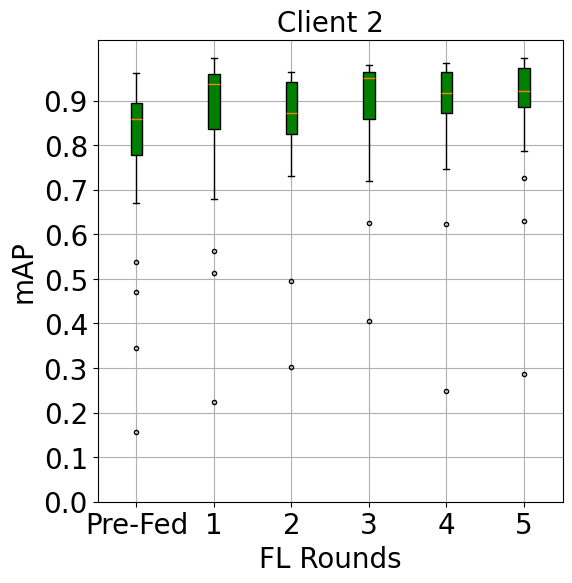

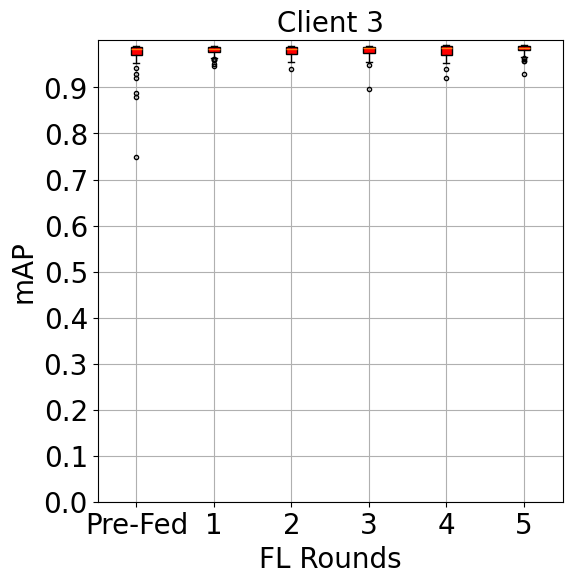

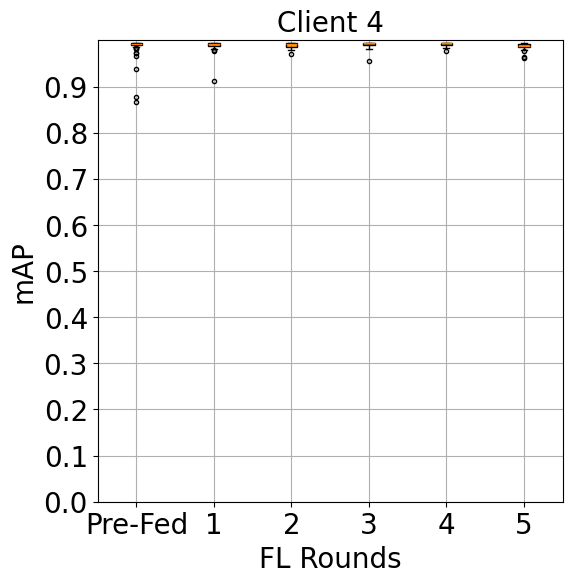

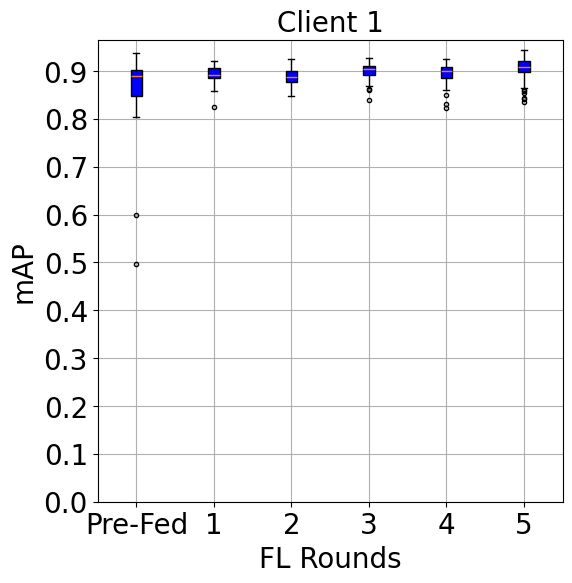

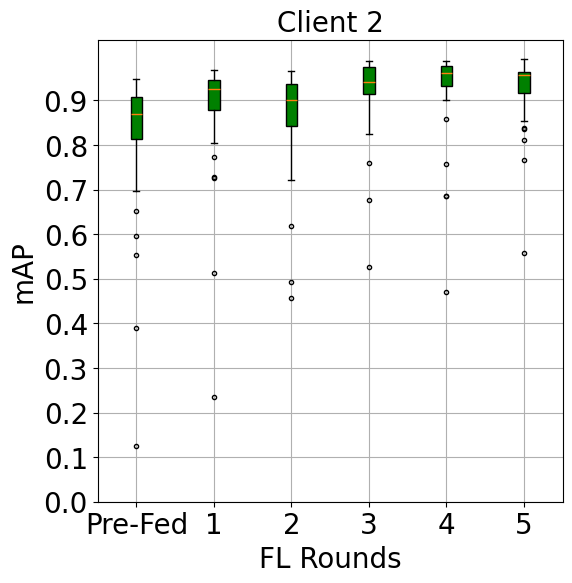

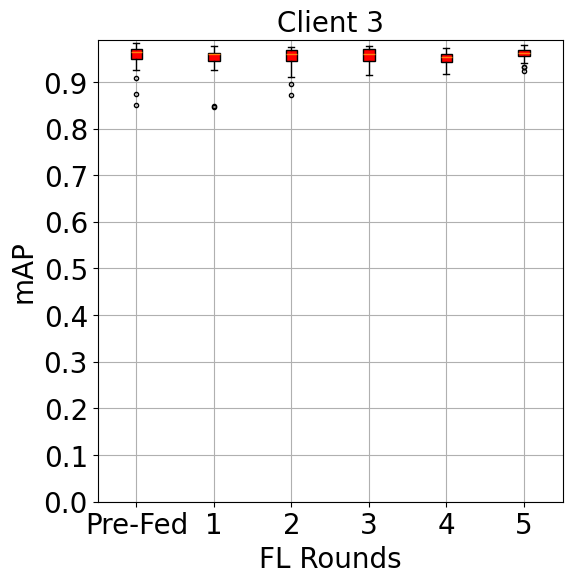

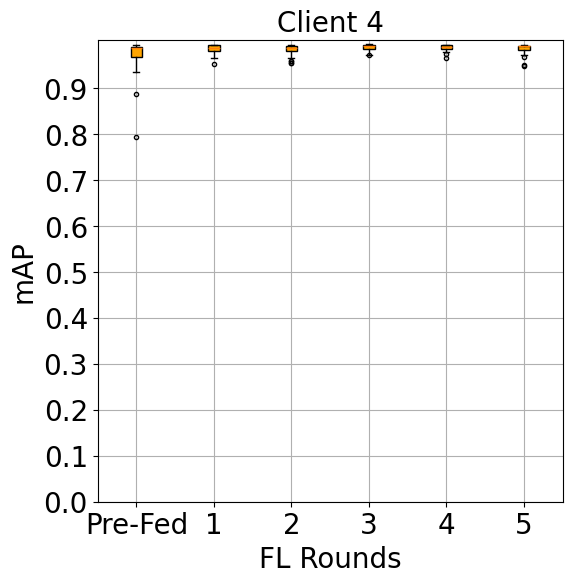

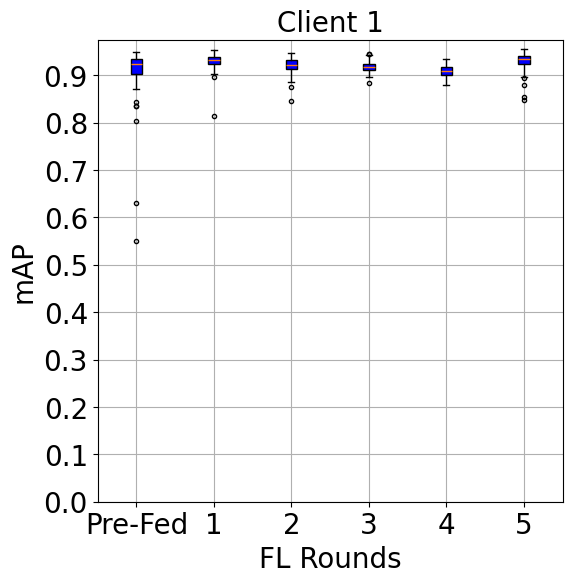

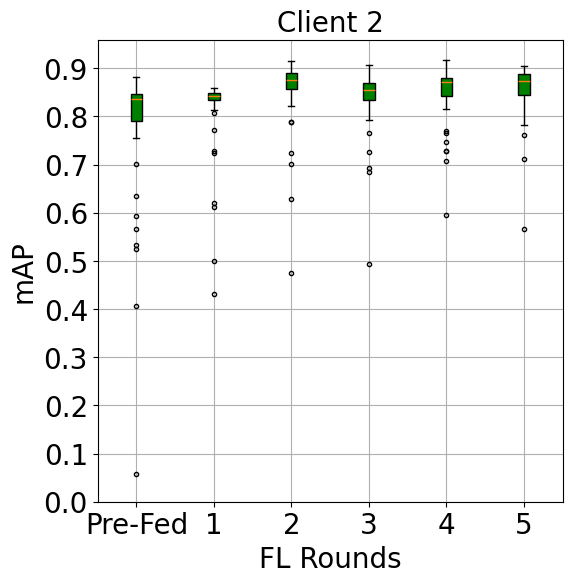

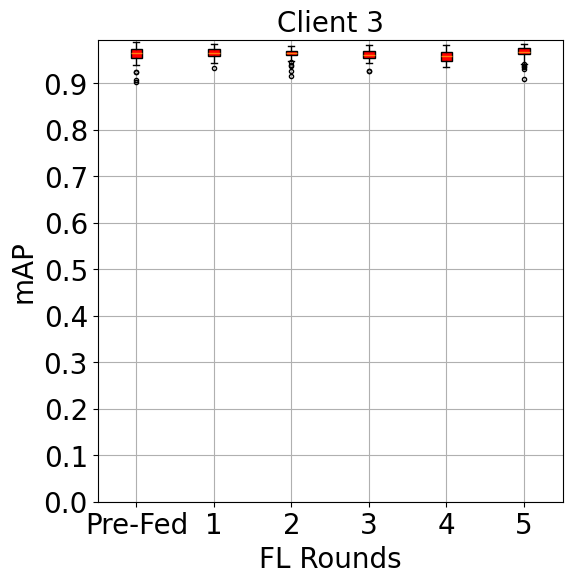

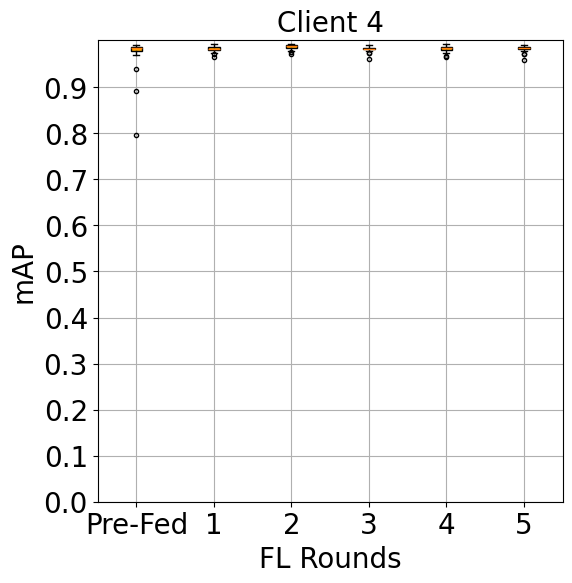

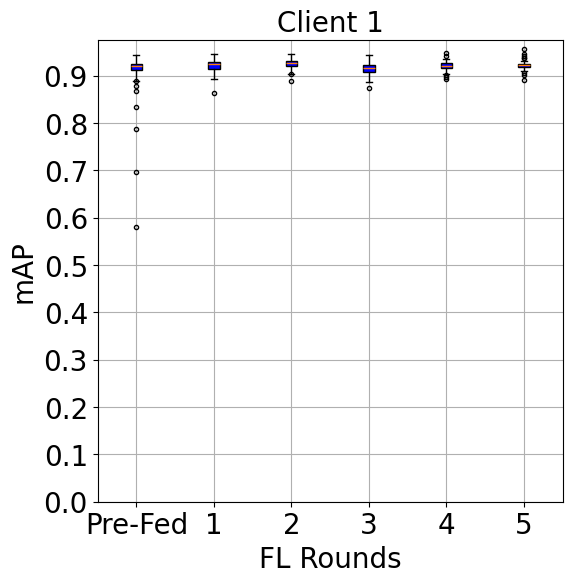

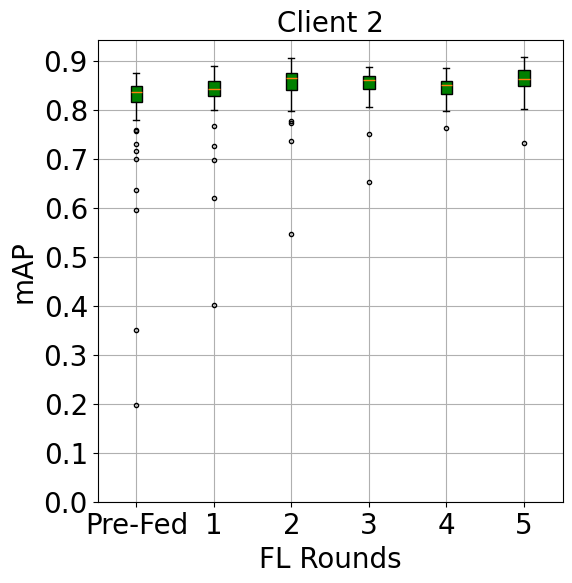

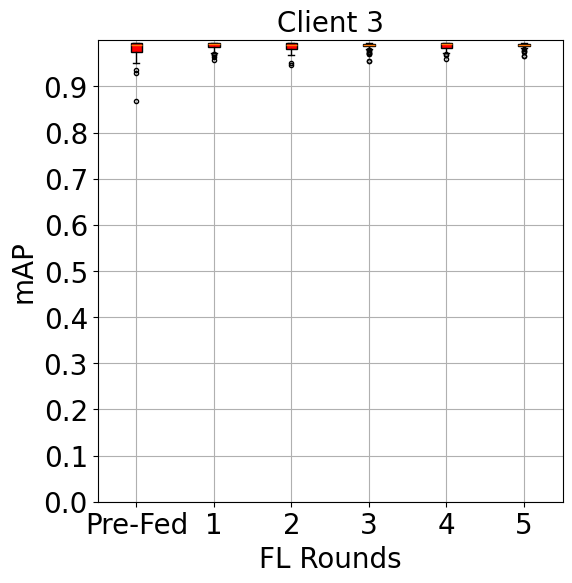

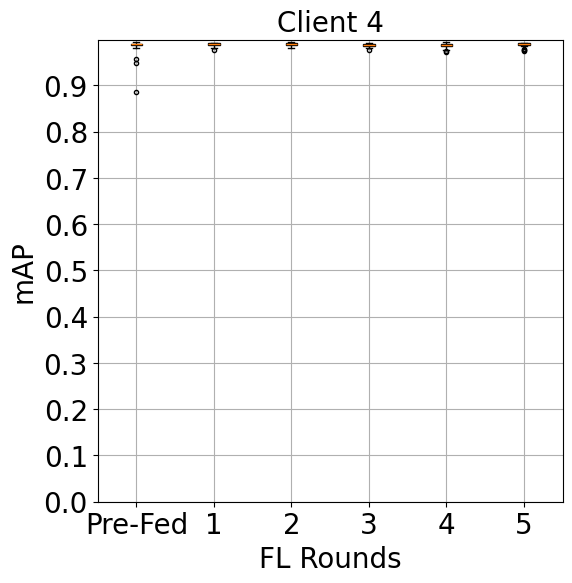

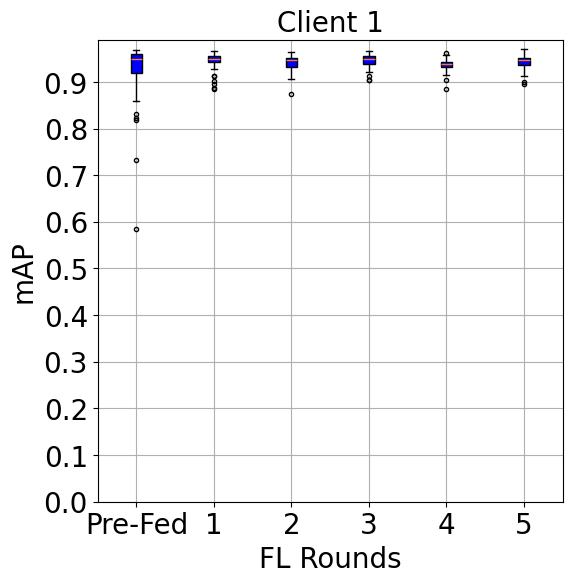

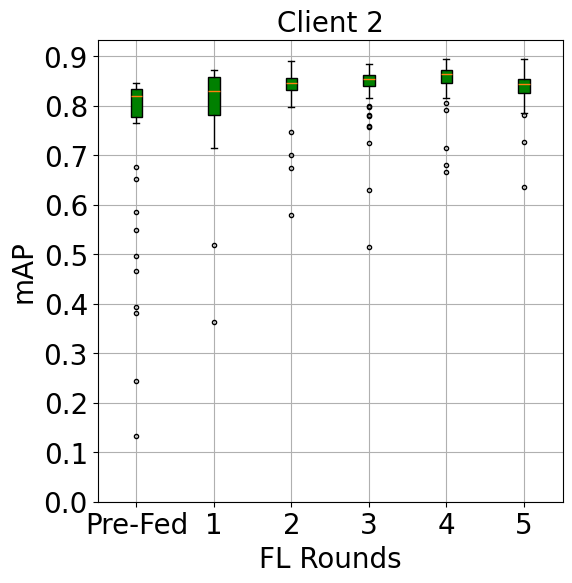

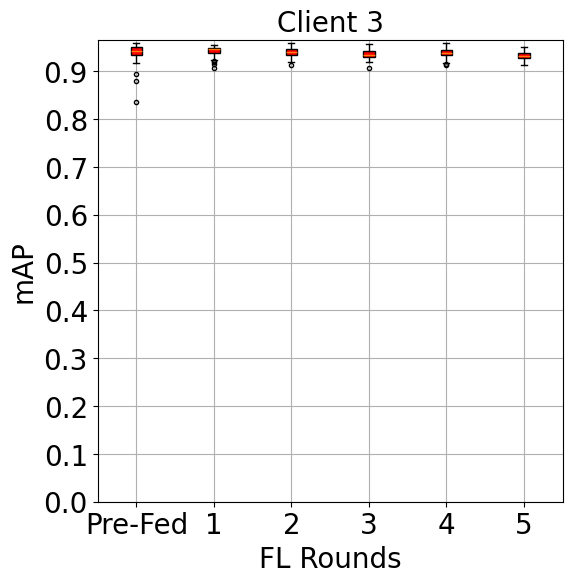

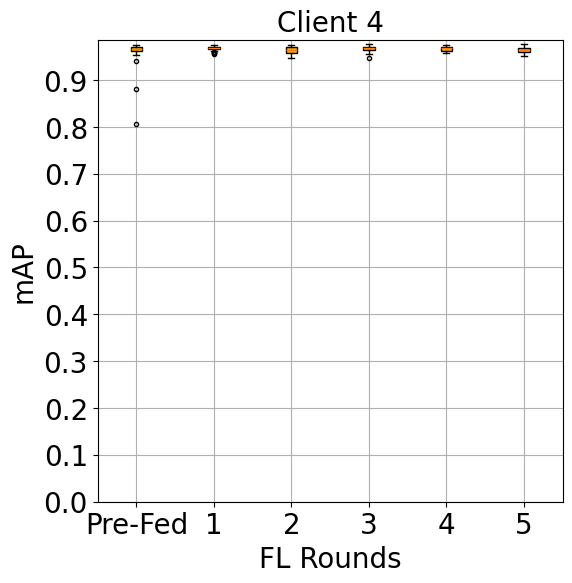

In [8]:
for step in range(1, 6):
    for i in range(1, 5):
        no_fl = pd.read_csv(base_path + f'/runs/detect/round_{step}_fine_tune_client{i}/results.csv')
        round_1 = pd.read_csv(base_path + f'/runs/detect/round_{step}_fed1_fine_tune_client{i}/results.csv')
        round_2 = pd.read_csv(base_path + f'/runs/detect/round_{step}_fed12_fine_tune_client{i}/results.csv')
        round_3 = pd.read_csv(base_path + f'/runs/detect/round_{step}_fed123_fine_tune_client{i}/results.csv')
        round_4 = pd.read_csv(base_path + f'/runs/detect/round_{step}_fed1234_fine_tune_client{i}/results.csv')
        round_5 = pd.read_csv(base_path + f'/runs/detect/round_{step}_fed12345_fine_tune_client{i}/results.csv')
        mAP50 = [
            no_fl['metrics/mAP50(B)'],
            round_1['metrics/mAP50(B)'],  # Group 1
            round_2['metrics/mAP50(B)'],  # Group 2
            round_3['metrics/mAP50(B)'],
            round_4['metrics/mAP50(B)'],
            round_5['metrics/mAP50(B)'],# Group 3
        ]

        # precision = [
        #     [0.9936, 0.9677, 0.9174, 0.9559, 0.9420],
        #     [0.9234, 0.9521, 0.9691, 0.9379, 0.9550],
        #     [0.8596, 0.9122, 0.8279, 0.8080, 0.8349]
        # ]

        # recall = [
        #     [0.9545, 0.8933, 0.8814, 0.9926, 0.9611],
        #     [1.0000, 0.9422, 0.9188, 0.8920, 0.9024],
        #     [0.8333, 0.8221, 0.8237, 0.8308, 0.8362]
        # ]

        data = mAP50
        plt.figure(figsize=(6, 6))
        colors = ['blue', 'green', 'red', 'orange']
        plt.boxplot(data, widths=0.15, patch_artist=True, boxprops=dict(facecolor=colors[i-1]), flierprops=dict(marker='o', markersize=3), tick_labels=['Pre-Fed', '1', '2', '3', '4', '5'])
        plt.title(f'Client {i}', fontsize=20)
        plt.xlabel('FL Rounds', fontsize=20)
        plt.ylabel('mAP', fontsize=20)
        plt.grid(True)
        plt.yticks(ticks=[i * 0.1 for i in range(10)])
        plt.tick_params(axis='both', which='major', labelsize=20)
        # plt.gca().spines['top'].set_visible(False)
        plt.savefig(base_path + f'/plots/FL/step_{step}_client{i}.png', dpi=300)
        # plt.show()